<a href="https://colab.research.google.com/github/Vikashkrishna/ML_LAB/blob/main/2348571_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Market_Basket_Optimisation.csv')

In [ ]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(7500, 20)

In [ ]:
df.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [ ]:
df_encoded = pd.get_dummies(df, columns=["shrimp","olive oil","almonds","avocado","vegetables mix","green grapes","whole weat flour","yams","cottage cheese","energy drink","tomato juice","low fat yogurt","green tea","honey","salad","mineral water","salmon","antioxydant juice","frozen smoothie","spinach"])
print(df_encoded)


      shrimp_almonds  shrimp_antioxydant juice  shrimp_asparagus  \
0                  0                         0                 0   
1                  0                         0                 0   
2                  0                         0                 0   
3                  0                         0                 0   
4                  0                         0                 0   
...              ...                       ...               ...   
7495               0                         0                 0   
7496               0                         0                 0   
7497               0                         0                 0   
7498               0                         0                 0   
7499               0                         0                 0   

      shrimp_avocado  shrimp_babies food  shrimp_bacon  shrimp_barbecue sauce  \
0                  0                   0             0                      0   
1                  0 

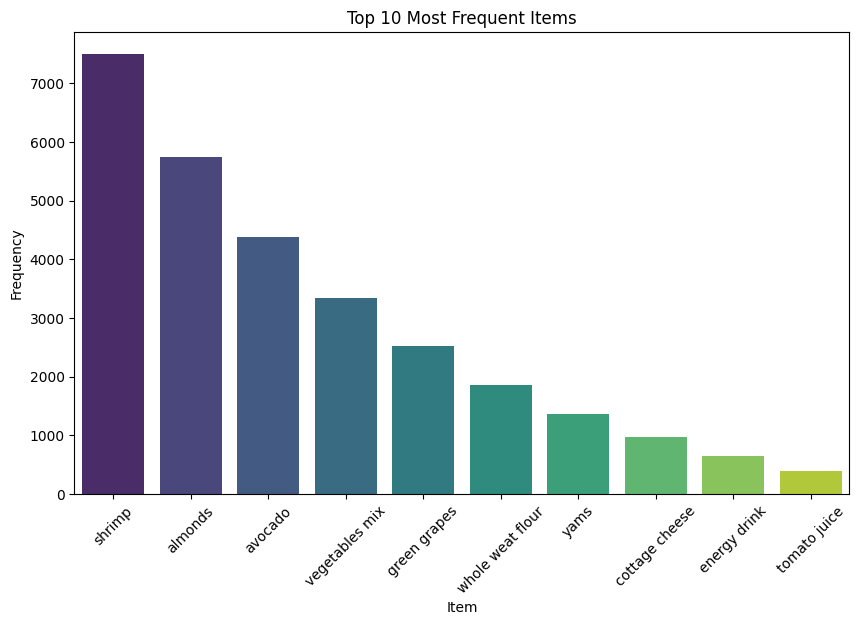

In [ ]:
item_counts = df.apply(lambda x: x.value_counts()).fillna(0)
top_items = item_counts.sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.show()


In [ ]:
transactions=[]
for index,row in df.iterrows():
  transactions.append(row.dropna().tolist())
transactions

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets



/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.076800,(shrimp_burgers),1
1,0.013067,(shrimp_cake),1
2,0.052133,(shrimp_chocolate),1
3,0.036000,(shrimp_cookies),1
4,0.037200,(shrimp_eggs),1
...,...,...,...
84,0.010267,"(shrimp_shrimp, almonds_frozen vegetables)",2
85,0.013333,"(almonds_mineral water, shrimp_spaghetti)",2
86,0.011867,"(avocado_spaghetti, almonds_ground beef)",2
87,0.017733,"(almonds_spaghetti, avocado_mineral water)",2


In [ ]:
popular_items=frequent_itemsets[frequent_itemsets['length']==1]
popular_items.drop("length",axis=1).sort_values(by='support',ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
15,0.076933,(shrimp_mineral water)
0,0.076800,(shrimp_burgers)
38,0.064533,(almonds_mineral water)
22,0.061067,(shrimp_turkey)
43,0.054800,(almonds_spaghetti)
2,0.052133,(shrimp_chocolate)
56,0.050000,(avocado_mineral water)
8,0.049733,(shrimp_frozen vegetables)
20,0.047200,(shrimp_spaghetti)
18,0.043200,(shrimp_shrimp)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


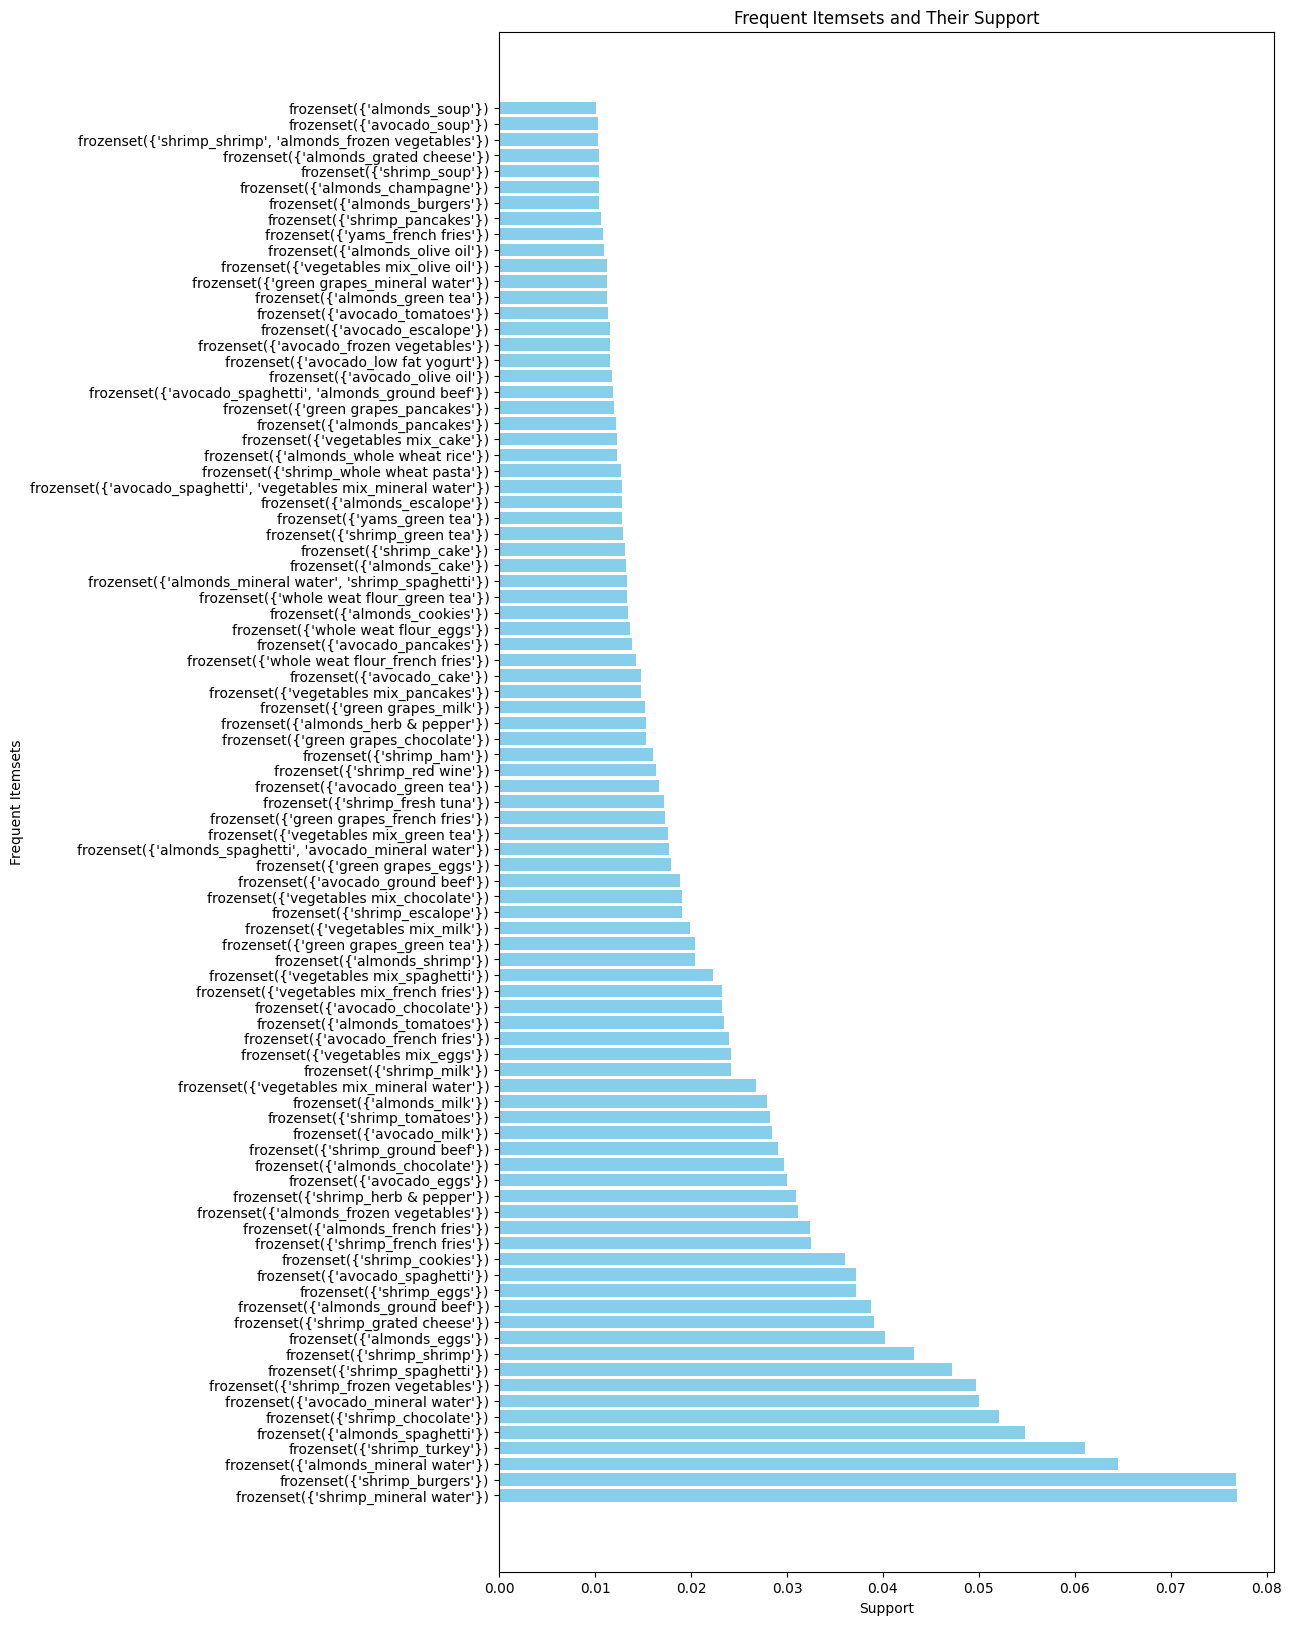

In [ ]:
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
plt.figure(figsize=(10, 20))
plt.barh(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Frequent Itemsets')
plt.title('Frequent Itemsets and Their Support')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


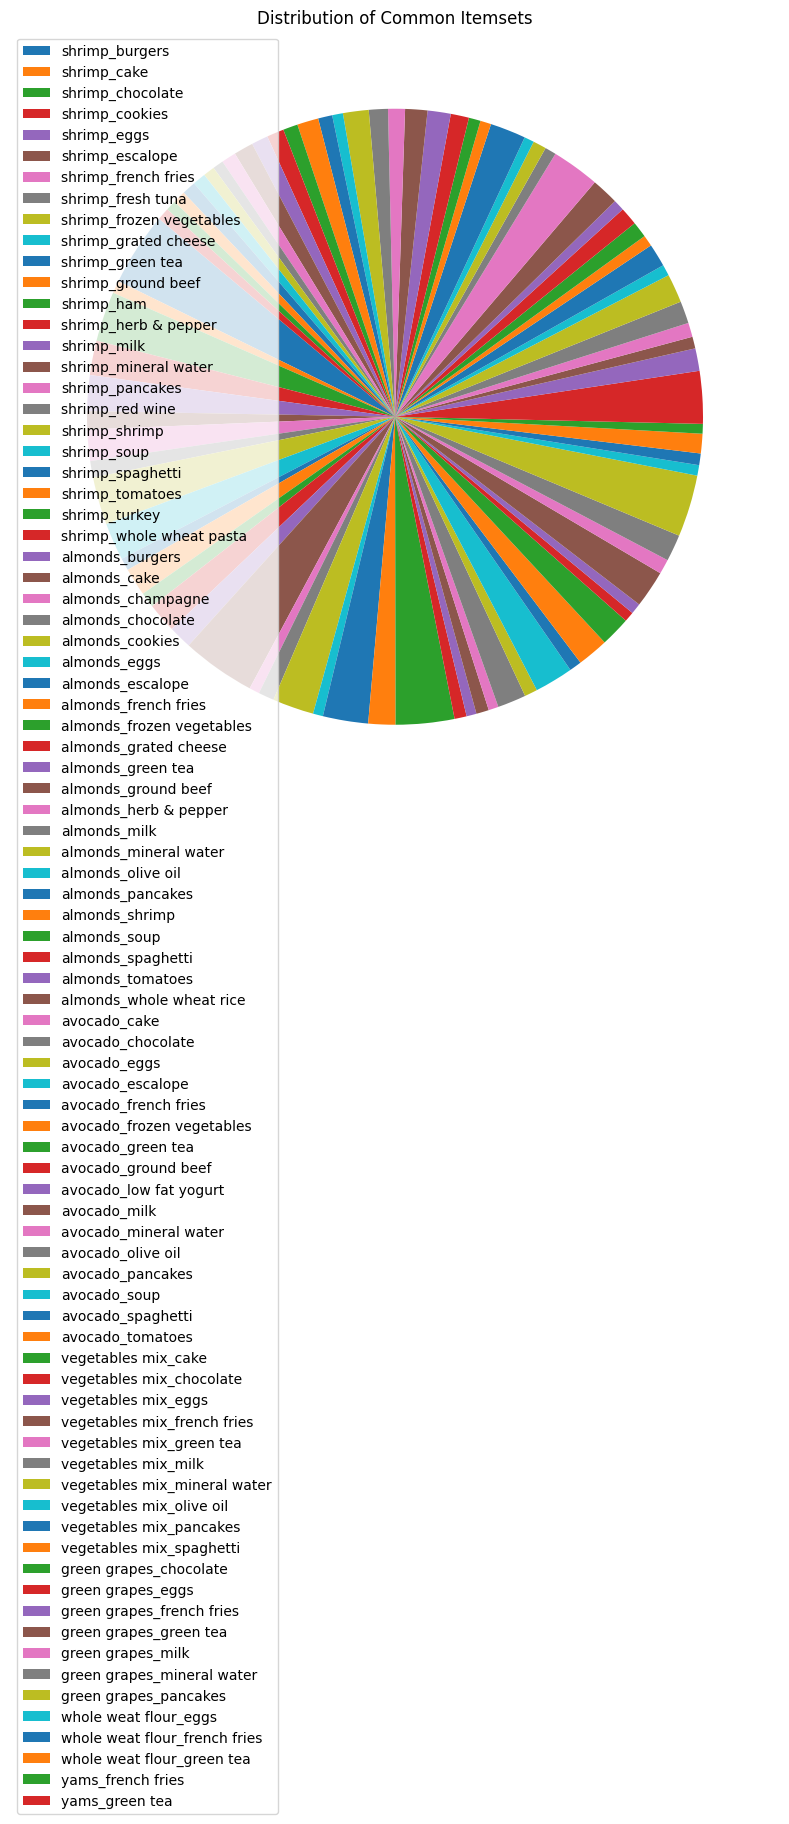

In [ ]:
support_values=popular_items['support'].values
total_support=sum(support_values)
percentages=[(support/total_support)*100 for support in support_values]
labels=popular_items['itemsets'].apply(lambda itemset:','.join(itemset))
plt.figure(figsize=(10, 10))
plt.pie(percentages,startangle=140)
plt.subplots_adjust(right=4.6)
plt.legend(labels,loc=0)
plt.title('Distribution of Common Itemsets')
plt.show()

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
print(rules)

                      antecedents                     consequents  \
0             (almonds_spaghetti)         (avocado_mineral water)   
1         (avocado_mineral water)             (almonds_spaghetti)   
2             (avocado_spaghetti)  (vegetables mix_mineral water)   
3  (vegetables mix_mineral water)             (avocado_spaghetti)   
4             (avocado_spaghetti)           (almonds_ground beef)   
5           (almonds_ground beef)             (avocado_spaghetti)   
6     (almonds_frozen vegetables)                 (shrimp_shrimp)   

   antecedent support  consequent support   support  confidence       lift  \
0              0.0548              0.0500  0.017733    0.323601   6.472019   
1              0.0500              0.0548  0.017733    0.354667   6.472019   
2              0.0372              0.0268  0.012800    0.344086  12.839031   
3              0.0268              0.0372  0.012800    0.477612  12.839031   
4              0.0372              0.0388  0.011867    0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = rules.drop(labels = ["antecedent support", "consequent support", "leverage", "zhangs_metric"], axis = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


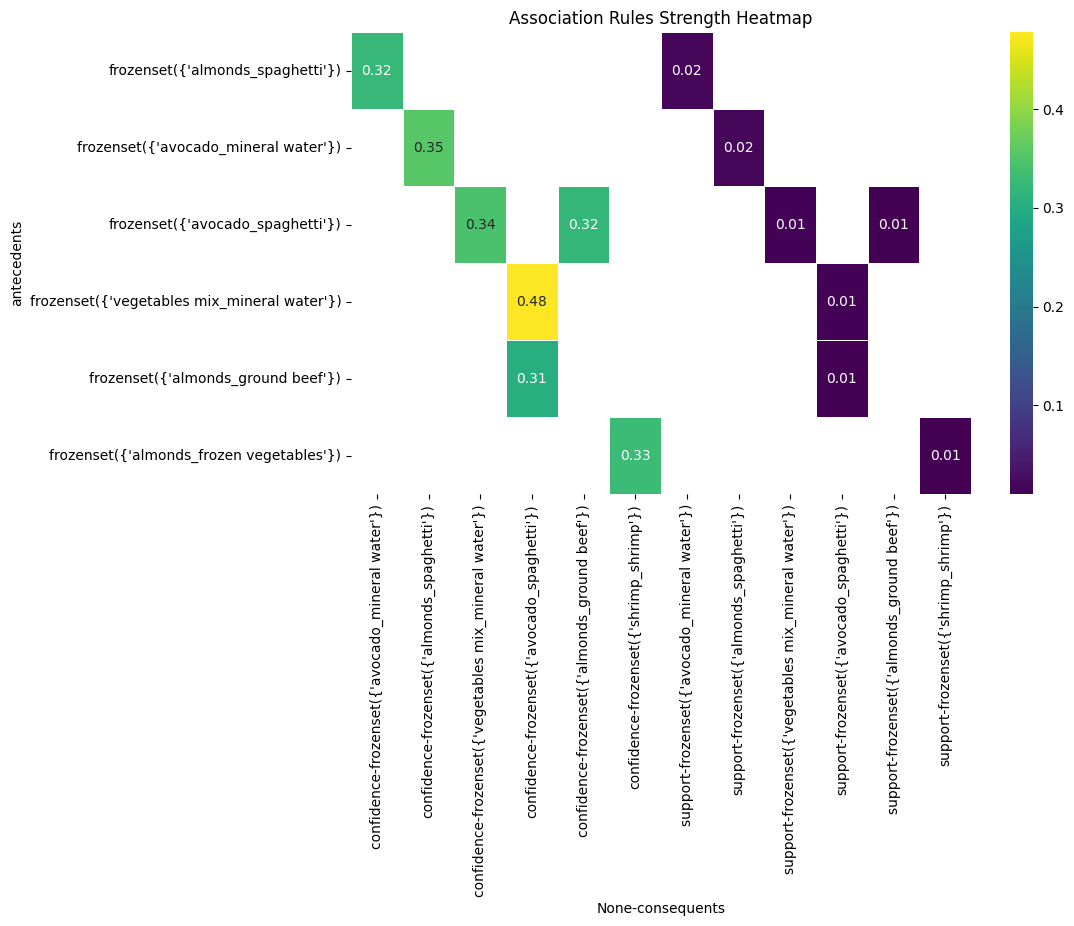

In [ ]:
heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values=['support', 'confidence'])
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Association Rules Strength Heatmap')
plt.show()

In [ ]:
rules.sort_values(by="support", axis = 0, ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
0,(almonds_spaghetti),(avocado_mineral water),0.017733,0.323601,6.472019,1.404496
1,(avocado_mineral water),(almonds_spaghetti),0.017733,0.354667,6.472019,1.464669
2,(avocado_spaghetti),(vegetables mix_mineral water),0.012800,0.344086,12.839031,1.483731
3,(vegetables mix_mineral water),(avocado_spaghetti),0.012800,0.477612,12.839031,1.843074
4,(avocado_spaghetti),(almonds_ground beef),0.011867,0.318996,8.221557,1.411446
5,(almonds_ground beef),(avocado_spaghetti),0.011867,0.305842,8.221557,1.387004
6,(almonds_frozen vegetables),(shrimp_shrimp),0.010267,0.329060,7.617126,1.426059


In [ ]:
rules.sort_values(by="lift", axis = 0, ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
3,(vegetables mix_mineral water),(avocado_spaghetti),0.012800,0.477612,12.839031,1.843074
2,(avocado_spaghetti),(vegetables mix_mineral water),0.012800,0.344086,12.839031,1.483731
4,(avocado_spaghetti),(almonds_ground beef),0.011867,0.318996,8.221557,1.411446
5,(almonds_ground beef),(avocado_spaghetti),0.011867,0.305842,8.221557,1.387004
6,(almonds_frozen vegetables),(shrimp_shrimp),0.010267,0.329060,7.617126,1.426059
0,(almonds_spaghetti),(avocado_mineral water),0.017733,0.323601,6.472019,1.404496
1,(avocado_mineral water),(almonds_spaghetti),0.017733,0.354667,6.472019,1.464669


In [ ]:
rules.sort_values(by="conviction", axis = 0, ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
3,(vegetables mix_mineral water),(avocado_spaghetti),0.012800,0.477612,12.839031,1.843074
2,(avocado_spaghetti),(vegetables mix_mineral water),0.012800,0.344086,12.839031,1.483731
1,(avocado_mineral water),(almonds_spaghetti),0.017733,0.354667,6.472019,1.464669
6,(almonds_frozen vegetables),(shrimp_shrimp),0.010267,0.329060,7.617126,1.426059
4,(avocado_spaghetti),(almonds_ground beef),0.011867,0.318996,8.221557,1.411446
0,(almonds_spaghetti),(avocado_mineral water),0.017733,0.323601,6.472019,1.404496
5,(almonds_ground beef),(avocado_spaghetti),0.011867,0.305842,8.221557,1.387004


In [ ]:
rules[ (rules['confidence'] > 0.4) &
       (rules['lift'] > 1.8) &
       (rules['conviction'] > 1.2)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
3,(vegetables mix_mineral water),(avocado_spaghetti),0.0128,0.477612,12.839031,1.843074


In [ ]:
rules = rules[(rules['consequents'] != {'mineral water'}) & (rules['consequents'] != {'spaghetti'})]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.sort_values(by = 'lift', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
3,(vegetables mix_mineral water),(avocado_spaghetti),0.012800,0.477612,12.839031,1.843074
2,(avocado_spaghetti),(vegetables mix_mineral water),0.012800,0.344086,12.839031,1.483731
4,(avocado_spaghetti),(almonds_ground beef),0.011867,0.318996,8.221557,1.411446
5,(almonds_ground beef),(avocado_spaghetti),0.011867,0.305842,8.221557,1.387004
6,(almonds_frozen vegetables),(shrimp_shrimp),0.010267,0.329060,7.617126,1.426059
0,(almonds_spaghetti),(avocado_mineral water),0.017733,0.323601,6.472019,1.404496
1,(avocado_mineral water),(almonds_spaghetti),0.017733,0.354667,6.472019,1.464669
